# Example of Data Analysis with DCD Hub Data

First, we will install the Python SDK of DCD-hub and other libraries to gerate plot from the data.

In your project folder, create "requirements.txt" file and save the file with the text written below:

dcd-sdk>=0.0.22 <br />
paho-mqtt <br />
python-dotenv <br />
pyserial <br />
requests <br />
jwt>=0.6.1 <br />
dotenv <br />
numpy <br />
pandas <br />
matplotlib <br />
scipy <br />


Open the terminal (unix)/commant prompt(windows) and enter command "without Quotes"<br /> "pip3 install -r requirements.txt --user" 

Also, create a .env file in the same project folder and write your Thing_ID and THING_TOKEN in the format mentione below "without Quotes"


THING_ID="YOUR THING ID"<br />
THING_TOKEN="YOUR THING TOKEN"<br />

Now here in the code, we first import the dcd-hub here.

In [1]:
from dcd.entities.thing import Thing

Then, we provide the thing ID and access token (replace with yours)

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()

True

Now here in the code, we instantiate a Thing with its credential that we stored in .env file, and then we fetch its details

In [3]:
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:wheelchair-group-1-cd6d:Initialising MQTT connection for Thing 'dcd:things:wheelchair-group-1-cd6d'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:wheelchair-group-1-cd6d:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair-group-1-cd6d HTTP/1.1" 200 283


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:wheelchair-group-1-cd6d', 'name': 'Wheelchair group 1', 'description': 'Wheelchair group 1', 'type': 'Wheelchair', 'properties': [], 'registeredAt': '2019-10-21T09:54:33.000Z', 'readAt': 1571669319281, 'keys': {}}}


What does a Thing look like? Lets see it here in the output generated below from json parser function "to_json()"

In [21]:
my_thing.to_json()

{'id': 'dcd:things:wheelchair-group-1-cd6d',
 'name': 'Wheelchair group 1',
 'description': 'Wheelchair group 1',
 'type': 'Wheelchair',
 'properties': []}

Which property do we want to explore and over which time frame? To do that, We will define the "START_DATE" and "END_DATE" for our time frame

In [22]:
from datetime import datetime
# What dates?
START_DATE = "2019-10-08 21:17:00"
END_DATE = "2019-11-08 21:25:00"

from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data. Replace "Property_Name" with your own property name which you would like to read data from. For example, read the accelerometer value of the thing, use PROPERTY_NAME = "Accelerometer"

In [23]:
PROPERTY_NAME = "Accelerometer"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

AttributeError: 'NoneType' object has no attribute 'read'

How many data point did we get?

In [24]:
print(len(my_property.values))

AttributeError: 'NoneType' object has no attribute 'values'

Display values

In [25]:
my_property.values

AttributeError: 'NoneType' object has no attribute 'values'

# From CSV

Here we will extract data from the CSV file and plot some chart 

In [26]:
from numpy import genfromtxt
import pandas as pd
data = genfromtxt('data.csv', delimiter=',')
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['x', 'y', 'z'])
data_frame

,x,y,z
2019-10-07 16:56:11.446,0.009701,-0.074115,-0.185453
2019-10-07 16:56:11.533,0.027269,-0.069583,-0.198343
2019-10-07 16:56:11.643,0.039780,-0.066105,-0.186640
2019-10-07 16:56:11.785,0.052060,-0.077641,-0.170837
2019-10-07 16:56:11.884,0.039715,-0.071593,-0.188471
...,...,...,...
2019-10-07 16:56:38.723,-0.838292,0.228826,0.044570
2019-10-07 16:56:38.886,-0.810323,0.222667,0.028433
2019-10-07 16:56:38.886,-0.849075,0.214866,0.060519
2019-10-07 16:56:39.045,-0.849561,0.217760,0.058103


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
data = ma.array(my_property.values)

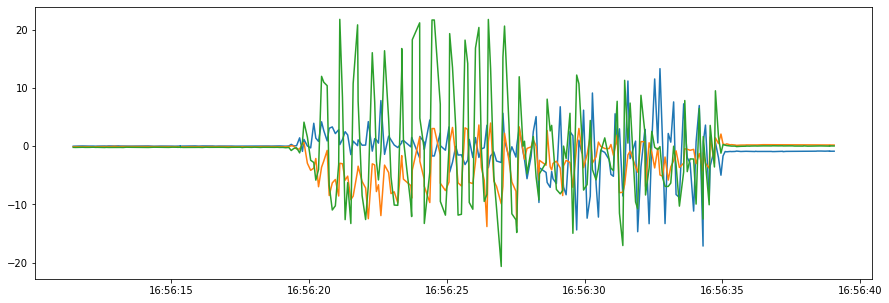

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
figure(num=None, figsize=(15, 5))
t = data_frame.index
plt.plot(t, data_frame.x, t, data_frame.y, t, data_frame.z)

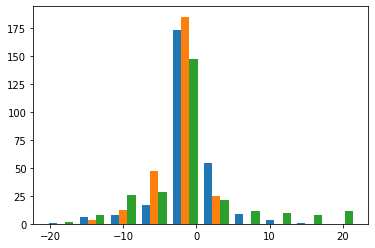

In [28]:
plt.hist(data[:,1:])
plt.show()

# Generate statistics with NumPy and Pandas

In [29]:
import numpy as np
from scipy.stats import kurtosis, skew

In [30]:
np.min(data[:,1:4], axis=0)

array([-17.14224625, -13.79257584, -20.64288521])

In [31]:
skew(data[:,1:4])

array([-0.89688613, -1.23809469,  0.76757991])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [32]:
data[:10,1:]

array([[ 0.00970082, -0.07411532, -0.18545274],
       [ 0.02726864, -0.06958251, -0.19834329],
       [ 0.03978035, -0.06610464, -0.18664022],
       [ 0.05206013, -0.07764083, -0.17083664],
       [ 0.0397151 , -0.07159336, -0.188471  ],
       [ 0.02992328, -0.07444451, -0.18695566],
       [ 0.03363691, -0.10220957, -0.15930049],
       [ 0.01179356, -0.06460355, -0.18997429],
       [ 0.02983755, -0.06932511, -0.17842238],
       [ 0.04382452, -0.06352246, -0.19168401]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [33]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0,1,2
count,272.000000,272.000000,272.000000
mean,-0.557388,-1.787206,-0.051416
std,3.745995,3.214806,7.316358
min,-17.142246,-13.792576,-20.642885
25%,-0.903258,-3.436087,-2.816740
50%,0.025114,-0.084160,-0.173673
75%,0.410247,0.214146,0.080619
max,13.336728,3.991868,21.804655


In [34]:
data_frame.rolling(10).std()

,0,1,2
2019-10-07 16:56:11.446,NaN,NaN,NaN
2019-10-07 16:56:11.533,NaN,NaN,NaN
2019-10-07 16:56:11.643,NaN,NaN,NaN
2019-10-07 16:56:11.785,NaN,NaN,NaN
2019-10-07 16:56:11.884,NaN,NaN,NaN
...,...,...,...
2019-10-07 16:56:38.723,0.013891,0.007798,0.015456
2019-10-07 16:56:38.886,0.016892,0.007907,0.014749
2019-10-07 16:56:38.886,0.015726,0.008693,0.013981
2019-10-07 16:56:39.045,0.015876,0.008522,0.012299


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

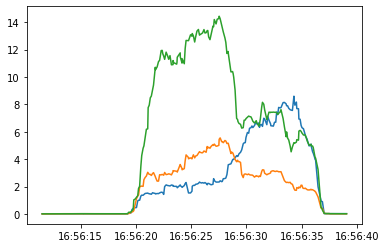

In [35]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

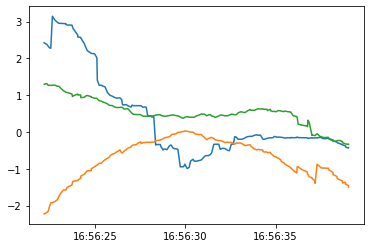

In [36]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

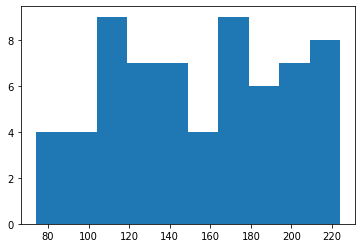

In [37]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions